In [ ]:
import cv2
import numpy as np
from keras.models import model_from_json
from google.colab.patches import cv2_imshow

emotion_dict = {0: "Angry", 1: "Disgusted", 2: "Fearful", 3: "Happy", 4: "Neutral", 5: "Sad", 6: "Surprised"}

# load json and create model
json_file = open('/content/emotion_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
emotion_model = model_from_json(loaded_model_json)

# load weights into new model
emotion_model.load_weights("/content/emotion_model.h5")
print("Loaded model from disk")

# start the webcam feed
#cap = cv2.VideoCapture(0)

# pass here your video path
# you may download one from here: https://www.pexels.com/video/three-girls-laughing-5273028/
cap = cv2.VideoCapture("/content/pexels-gabby-k-5273028 (2160p).mp4")

while True:
    # Find haar cascade to draw a bounding box around the face
    ret, frame = cap.read()
    frame = cv2.resize(frame, (1280, 720))
    if not ret:
        break
    face_detector = cv2.CascadeClassifier('/content/haarcascade_frontalface_default.xml')
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # detect faces available on the camera
    num_faces = face_detector.detectMultiScale(gray_frame, scaleFactor=1.3, minNeighbors=5)

    # take each face available on the camera and preprocess it
    for (x, y, w, h) in num_faces:
        cv2.rectangle(frame, (x, y-50), (x+w, y+h+10), (0, 255, 0), 4)
        roi_gray_frame = gray_frame[y:y + h, x:x + w]
        cropped_img = np.expand_dims(np.expand_dims(cv2.resize(roi_gray_frame, (48, 48)), -1), 0)

        # predict the emotions
        emotion_prediction = emotion_model.predict(cropped_img)
        maxindex = int(np.argmax(emotion_prediction))
        cv2.putText(frame, emotion_dict[maxindex], (x+5, y-20), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2, cv2.LINE_AA)

    cv2_imshow(frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


# New Section

Loaded model from disk
1/1 [==============================] - 0s 27ms/step


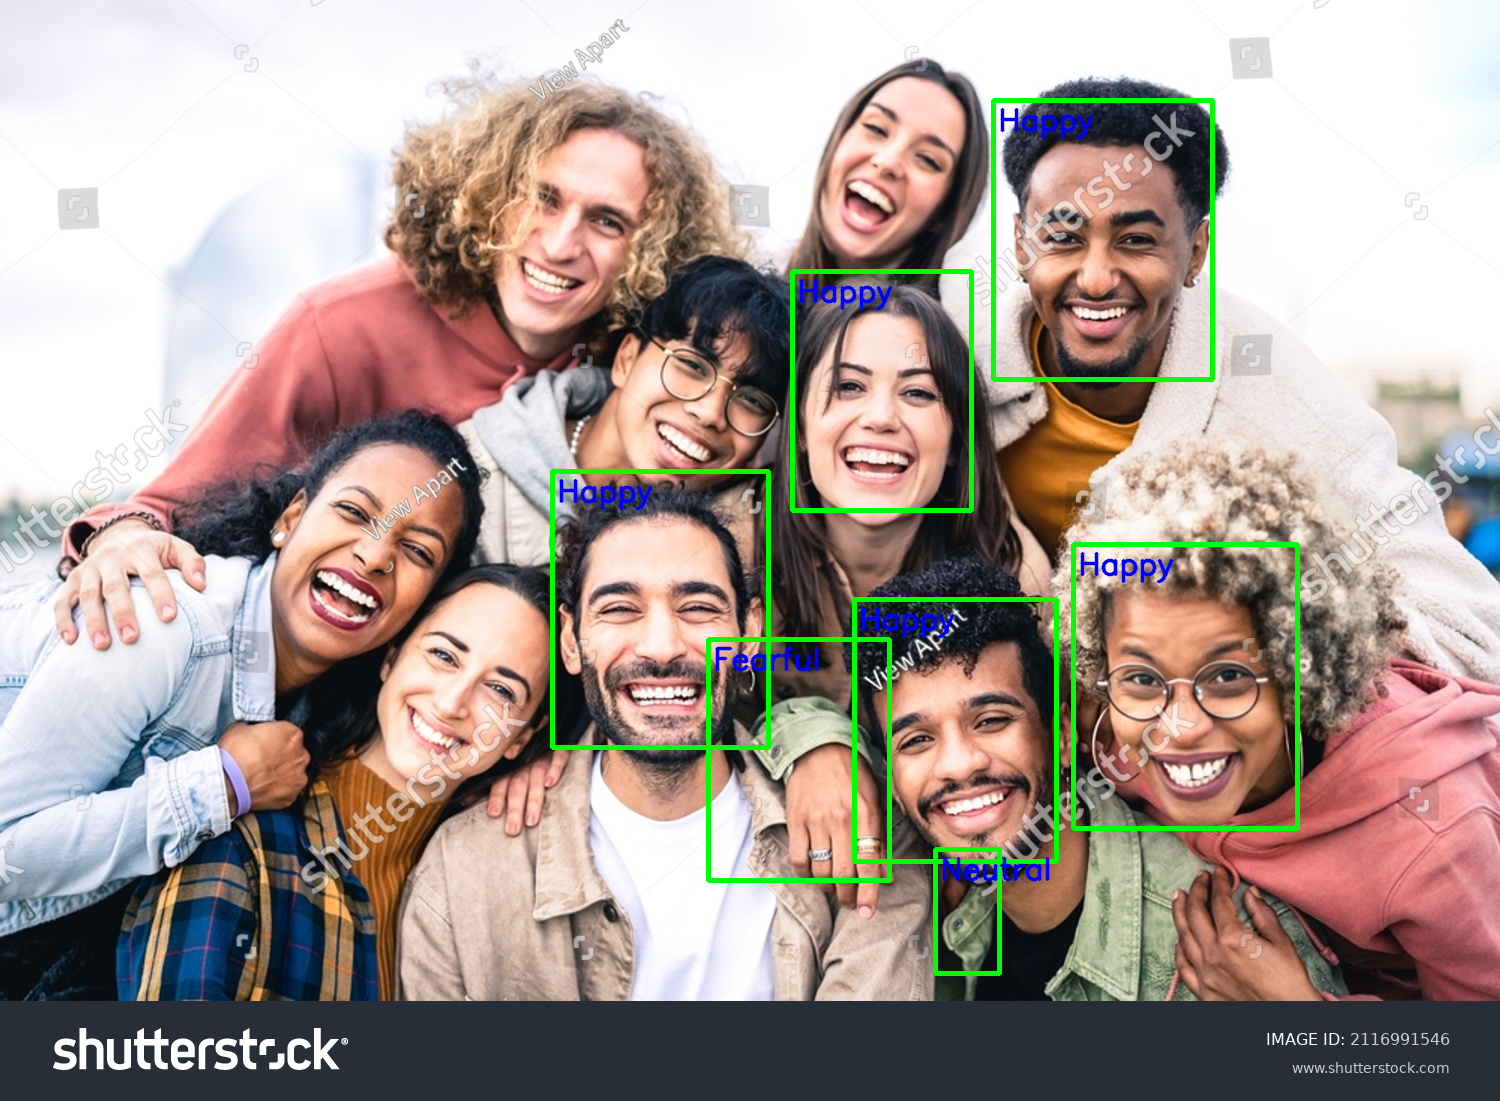

In [ ]:
import cv2
import numpy as np
from keras.models import model_from_json
from google.colab.patches import cv2_imshow
emotion_dict = {0: "Angry", 1: "Disgusted", 2: "Fearful", 3: "Happy", 4: "Neutral", 5: "Sad", 6: "Surprised"}

# Load the emotion detection model from JSON and weights
json_file = open('/content/emotion_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
emotion_model = model_from_json(loaded_model_json)
emotion_model.load_weights("/content/emotion_model.h5")
print("Loaded model from disk")

# Load the image for emotion detection
image_path = "/content/stock-photo-multi-ethnic-guys-and-girls-taking-selfie-outdoors-with-backlight-happy-life-style-friendship-2116991546.jpg"  # Replace with the path to your image
frame = cv2.imread(image_path)

# Find haar cascade to draw bounding box around face
face_detector = cv2.CascadeClassifier('/content/haarcascade_frontalface_default.xml')
gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

# Detect faces in the image
num_faces = face_detector.detectMultiScale(gray_frame, scaleFactor=1.3, minNeighbors=5)

# Process each detected face
for (x, y, w, h) in num_faces:
    cv2.rectangle(frame, (x, y-50), (x+w, y+h+10), (0, 255, 0), 4)
    roi_gray_frame = gray_frame[y:y + h, x:x + w]
    cropped_img = np.expand_dims(np.expand_dims(cv2.resize(roi_gray_frame, (48, 48)), -1), 0)

    # Predict the emotions
    emotion_prediction = emotion_model.predict(cropped_img)
    maxindex = int(np.argmax(emotion_prediction))
    cv2.putText(frame, emotion_dict[maxindex], (x+5, y-20), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2, cv2.LINE_AA)

# Display the image with emotion labels
cv2_imshow(frame)
cv2.waitKey(0)
cv2.destroyAllWindows()
